<a href="https://colab.research.google.com/github/KomalKolte2001/Task_2/blob/main/Supervised_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Regression

### Importing the library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the dataset

In [2]:
df=pd.read_csv("/content/medicalprice.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Pre-processing of the data

In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Finding the Null value

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Columns with object type values

In [10]:

df.select_dtypes('object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [11]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'sex': 2, 'smoker': 2, 'region': 4}

In [12]:
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'sex': ['female', 'male'],
 'smoker': ['yes', 'no'],
 'region': ['southwest', 'southeast', 'northwest', 'northeast']}

### Create function for gender encoding 

In [13]:
def encode_sex(x):
    if x.lower()[0] == 'f':   #if first letter of gender ie 0 is equal to f 
        return 0
    elif x.lower()[0] == 'm':
        return 1
    else:
        return 2

In [14]:
#apply the above function
df['sex'] = df['sex'].apply(encode_sex)

In [15]:
#create function for gender encoding 

def encode_smoker(x):
    if x.lower()[0] == 'y':   #if first letter of gender ie 0 is equal to f 
        return 0
    elif x.lower()[0] == 'n':
        return 1
    else:
        return 2

In [16]:
#apply the above function
df['smoker'] = df['smoker'].apply(encode_smoker)

In [17]:
nominal_features = [
    'region'
   
]

In [18]:
def onehot_encode(data, columns, prefixes):
    data = data.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix)
        data = pd.concat([data, dummies], axis=1)
        data = data.drop(column, axis=1)
    return data

In [19]:
nominal_prefixes = [
    'Re',
    
]

In [20]:
df = onehot_encode(
    df,
    columns=nominal_features,
    prefixes=nominal_prefixes
)

In [21]:
df

,age,sex,bmi,children,smoker,charges,Re_northeast,Re_northwest,Re_southeast,Re_southwest
0,19,0,27.900,0,0,16884.92400,0,0,0,1
1,18,1,33.770,1,1,1725.55230,0,0,1,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0,1,0,0
1334,18,0,31.920,0,1,2205.98080,1,0,0,0
1335,18,0,36.850,0,1,1629.83350,0,0,1,0
1336,21,0,25.800,0,1,2007.94500,0,0,0,1


### Implementation the Model

In [22]:
x = df.charges
y = df.bmi

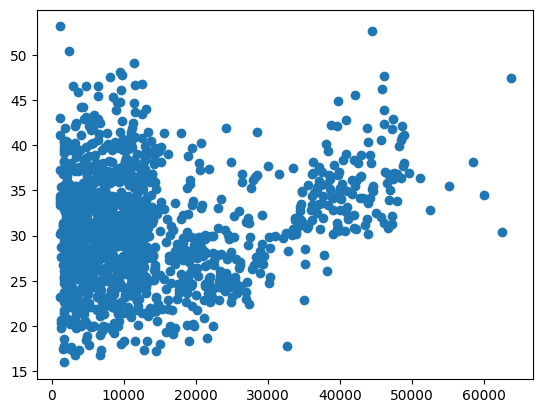

In [23]:
plt.scatter(x,y)

In [24]:
xmean=np.mean(x)
ymean=np.mean(y)
print('Mean for x value is',xmean,'and mean for y value is',ymean)

Mean for x value is 13270.422265141257 and mean for y value is 30.66339686098655


### To calculate the coeffient and intercept

In [25]:
num=0
den=0
for i in range(len(x)):
    num+=(x[i]-xmean)*(y[i]-ymean)
    den+=(x[i]-xmean)**2
b1=num/den
b0=ymean-(b1*xmean)
print('Intercept',b0)
print('coefficient',b1)

Intercept 29.337977354094626
coefficient 9.987771906652404e-05


In [26]:
y_pred=b0+b1*x
y_pred

0       31.024405
1       29.510322
2       29.782379
3       31.533736
4       29.724190
          ...    
1333    30.396736
1334    29.558306
1335    29.500761
1336    29.538526
1337    32.248550
Name: charges, Length: 1338, dtype: float64

### Ploting the Linear Regression

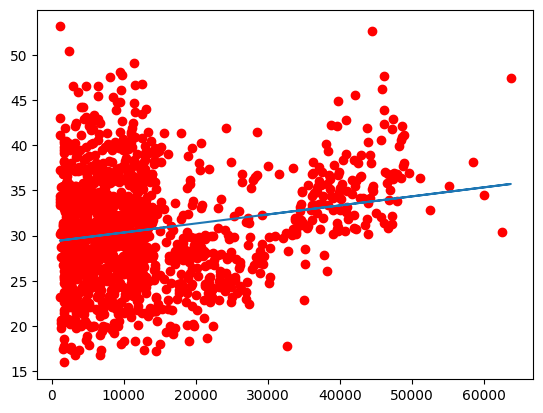

In [27]:
plt.scatter(x,y,c='r')
plt.plot(x,y_pred)
plt.show()

### To calculate the R square

In [28]:
num_r=0
den_r=0
for i in range(len(x)):
    num_r+=(y[i]-y_pred[i])**2
    den_r+=(y[i]-ymean)**2
r_sq = 1-(num_r/den_r)
print(r_sq)

0.0393391399178622
